In [1]:
import os
import tarfile
import pandas as pd
import numpy as np
from six.moves import urllib
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

# Ensuring plots display inline in Jupyter Notebook
%matplotlib inline

# Constants for downloading and extracting the data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# Fetch and load the housing data
fetch_housing_data()
housing = load_housing_data()

# Display the first few rows and dataset info
print(housing.head())
housing.info()
housing.describe()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [2]:
housing.isnull().sum()
#Here we can conclude that 'total_bedrooms' only have missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: ylabel='count'>

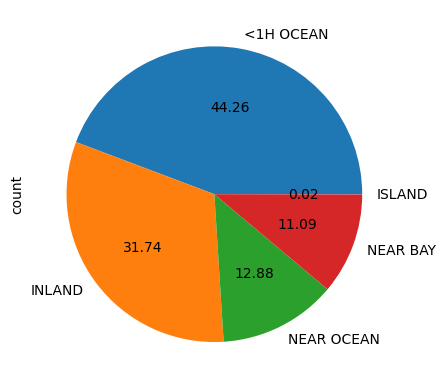

In [3]:
housing['ocean_proximity'].value_counts().plot(kind='pie',autopct='%0.2f')

In [4]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [5]:
#first we need to convert the categorical data i.e. 'ocean_proximity' to numeric values using oneHot Encoding
# Perform one-hot encoding for the 'ocean_proximity' column
housing_encoded = pd.get_dummies(housing, columns=['ocean_proximity'])

# Display the first few rows of the updated dataframe
print(housing_encoded.head())

# Update the original dataframe by adding the one-hot encoded columns and removing the original column
housing = housing_encoded

# Display the first few rows of the final dataframe
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                      False                   False                   False   
1   

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


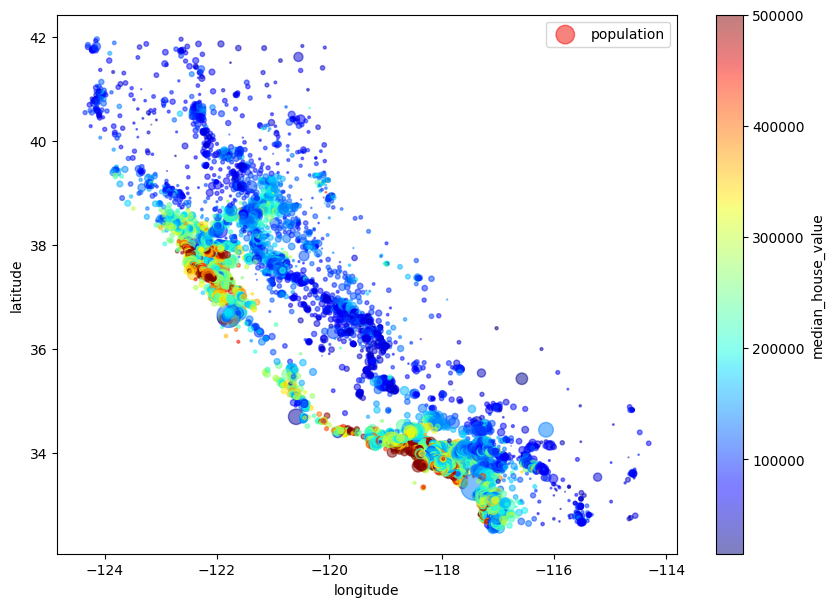

In [7]:
# Plot a scatter plot for visualization
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.5, s=housing["population"]/100, label="population", figsize = (10,7), c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
housing['total_bedrooms'] = imputer.fit_transform(housing['total_bedrooms'].values.reshape(-1,1))

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [11]:
housing.isnull().sum()
#now we have filled all the missing values 

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='median_income', ylabel='median_house_value'>

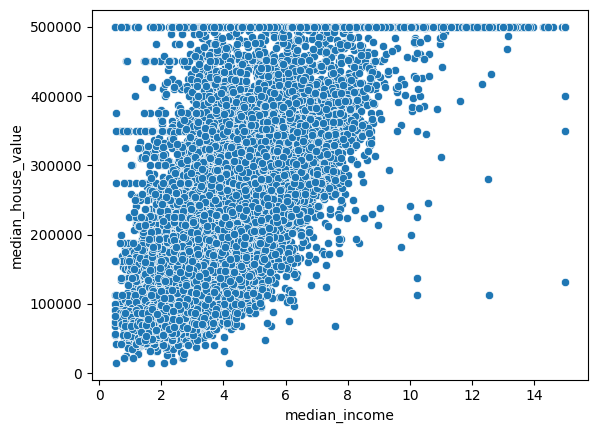

In [13]:
import seaborn as sns
sns.scatterplot(x=housing['median_income'], y=housing['median_house_value'])

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

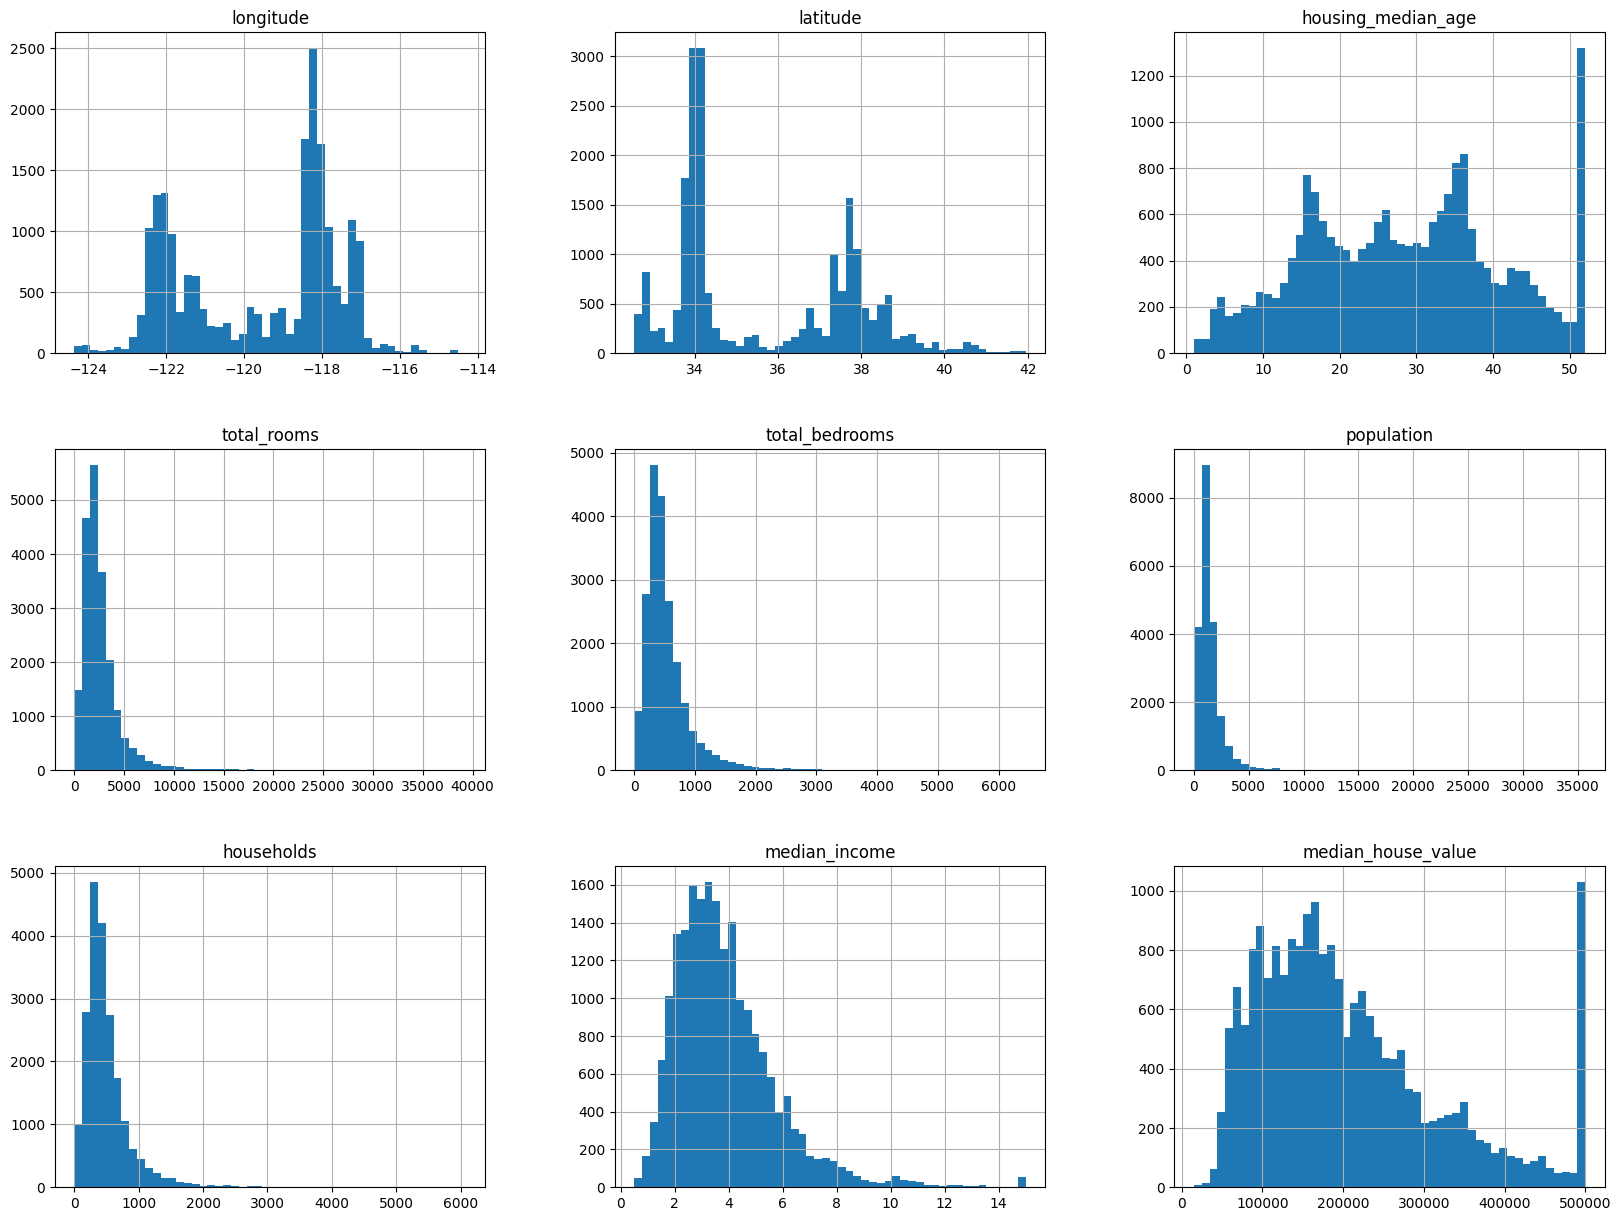

In [14]:
housing.hist(bins=50, figsize=(20,15))

(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <BarContainer object of 10 artists>)

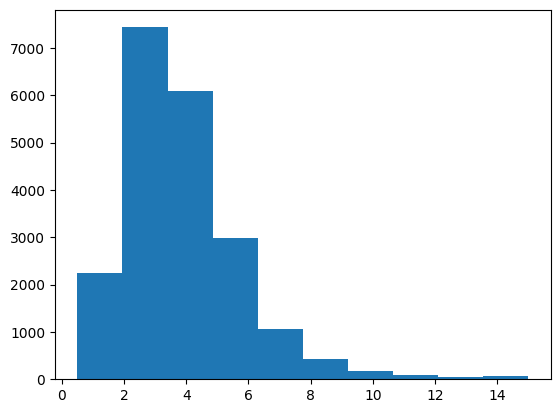

In [15]:
plt.hist(housing['median_income'])

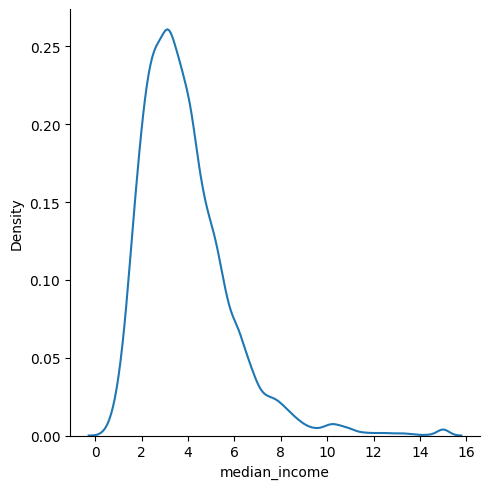

In [16]:
sns.displot(housing['median_income'],kind='kde')

<Axes: ylabel='housing_median_age'>

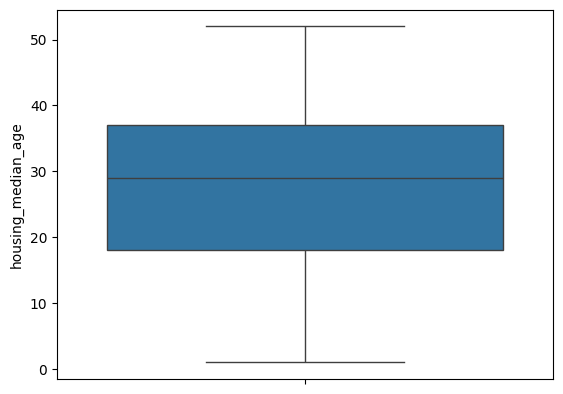

In [17]:
sns.boxplot(housing['housing_median_age'])

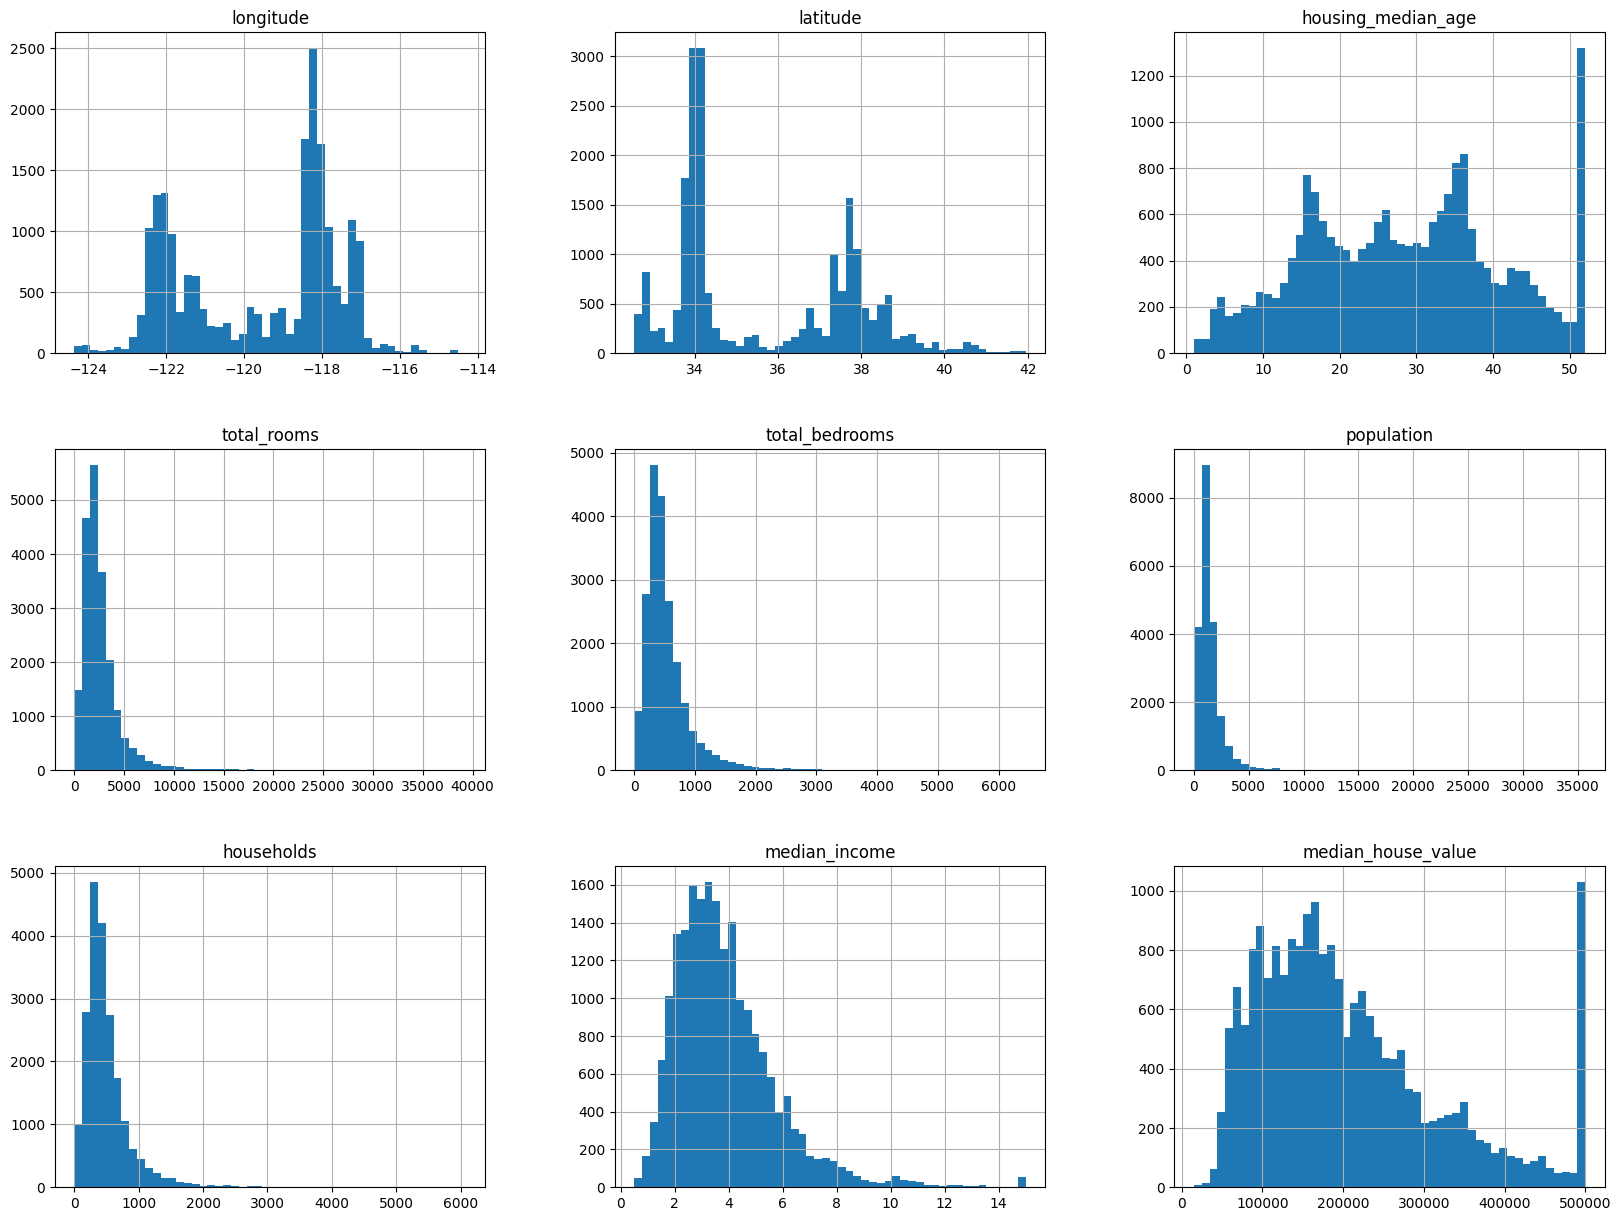

In [18]:
# Plot histograms for all attributes
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
# Create income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"] = housing["income_cat"].where(housing["income_cat"] < 5, 5.0)
housing = housing.drop('median_income', axis=1)

In [20]:
corr_matrix = housing.corr()
corr_median_house_value = corr_matrix["median_house_value"].sort_values(ascending=False)
print(corr_median_house_value)

median_house_value            1.000000
income_cat                    0.643892
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


In [21]:
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

# Splitting into training and test dataset using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# Check the distribution of income categories in the test set
print(X_test["income_cat"].value_counts() / len(X_test))

income_cat
3.0    0.337452
2.0    0.319041
4.0    0.176841
5.0    0.125000
1.0    0.041667
Name: count, dtype: float64


In [28]:
X_test.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat
16961,-122.29,37.53,41.0,839.0,190.0,419.0,215.0,False,False,False,False,True,4.0


In [22]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat
1652,-121.97,37.93,4.0,3241.0,464.0,1552.0,494.0,False,True,False,False,False,5.0
14652,-117.15,32.80,41.0,1413.0,261.0,1070.0,259.0,False,False,False,False,True,2.0
3548,-118.61,34.25,16.0,8295.0,1506.0,3903.0,1451.0,True,False,False,False,False,4.0
6730,-118.14,34.11,52.0,2742.0,422.0,1153.0,414.0,True,False,False,False,False,5.0
18445,-121.81,37.25,25.0,4096.0,623.0,2128.0,618.0,True,False,False,False,False,5.0


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1652 to 14155
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16512 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   ocean_proximity_<1H OCEAN   16512 non-null  bool   
 8   ocean_proximity_INLAND      16512 non-null  bool   
 9   ocean_proximity_ISLAND      16512 non-null  bool   
 10  ocean_proximity_NEAR BAY    16512 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  16512 non-null  bool   
 12  income_cat                  16512 non-null  float64
dtypes: bool(5), float64(8)
memory usa

In [25]:
numerical_col = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms', 'population', 'households', 'income_cat']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the scaler on the numerical columns and transform the data
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_test[numerical_col] = scaler.fit_transform(X_test[numerical_col])

In [30]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,income_cat
1652,-1.197838,1.075202,-1.958346,0.277454,-0.177610,0.113326,-0.017593,False,True,False,False,False,1.905118
14652,1.207638,-1.326435,0.983427,-0.566370,-0.661390,-0.322462,-0.632126,False,False,False,False,True,-0.955764
3548,0.479008,-0.647610,-1.004257,2.610435,2.305634,2.238925,2.484997,True,False,False,False,False,0.951491
6730,0.713567,-0.713152,1.858008,0.047110,-0.277702,-0.247420,-0.226796,True,False,False,False,False,1.905118
18445,-1.117988,0.756856,-0.288691,0.672131,0.201311,0.634102,0.306672,True,False,False,False,False,1.905118


In [32]:
X_test.shape

(4128, 13)

In [34]:
X_train.shape

(16512, 13)

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# y_test are the true values and y_pred are predicted values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE

print(f"MAE: {mae}")L
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 32567.42722625969
MSE: 2483842027.4589586
RMSE: 49838.15834738437


C:\Users\monu1\ML_PATH\ML\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
y_pred = forest_reg.predict(X_test)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.8188531269014083


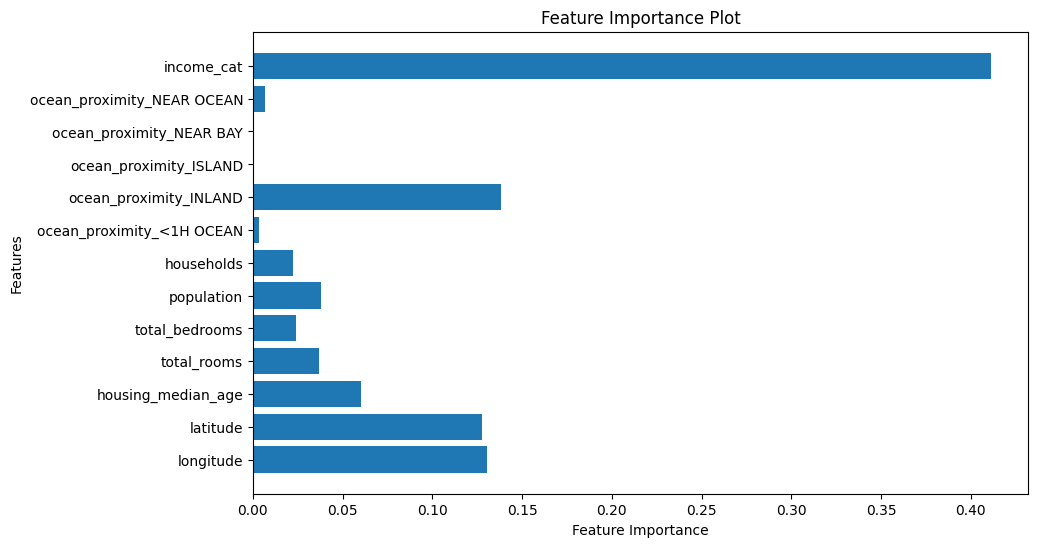

In [42]:
import matplotlib.pyplot as plt
feature_importances = forest_reg.feature_importances_
features = X_train.columns 

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


In [43]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(forest_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", cv_rmse_scores.mean())


Cross-Validation RMSE Scores: [49631.62057794 50205.69944146 52432.68062756 49948.59501988
 49888.32604327]
Mean RMSE: 50421.38434202387


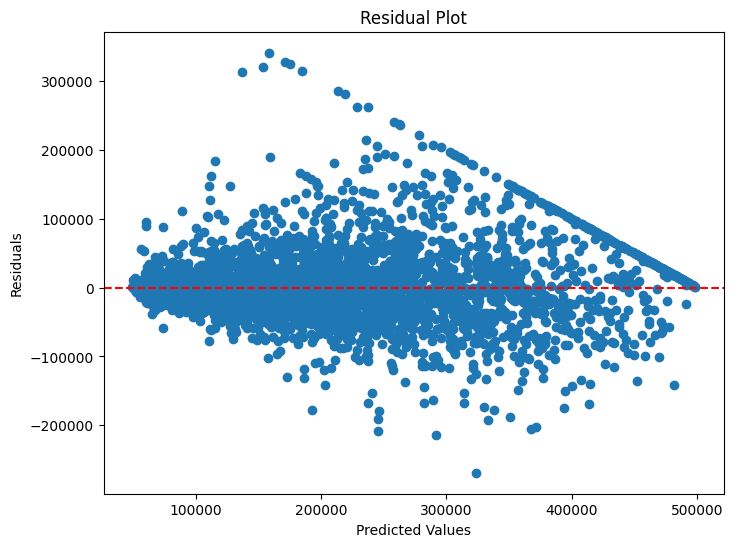

In [44]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [3, 10, 30],
     'max_features': [2, 4, 6, 8],
 'bootstrap': [False]
}

# Instantiate the grid search model
grid_search = GridSearchCV(forest_reg, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
Best CV RMSE: 51322.63324676126


In [50]:
y_pred1 = grid_search.predict(X_test)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred1)
print(f"R² Score: {r2}")

R² Score: 0.8095437846595825
